In [ ]:
### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [3]:
rating = pd.read_csv('Data.csv')
movie = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [186]:
print ('Rating Info\t')
rating.info()
print ('\nRating Shape =',rating.shape)
print ('\nRating Describe\n',rating.describe())
print ('\nRating Null items =', rating.isnull().sum().sum())

print ('\n\nMovie Info\t')
movie.info()
print ('\nMovie Shape =',movie.shape)
print ('\nMovie Describe\n',movie.describe())
print ('\nMovie Null items =', movie.isnull().sum().sum())

print ('\n\nUser Info\t')
user.info()
print ('\nUser Shape =',user.shape)
print ('\nUser Describe\n',user.describe())
print ('\nRatingUser Null items =', user.isnull().sum().sum())


Rating Info	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Rating Shape = (100000, 4)

Rating Describe
             user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.00000

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [187]:
bygenre=movie.drop(['movie id', 'movie title', 'release date'], axis=1)
bygenre.sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [4]:
# remove rows with unknown > 0
movie.drop(movie[movie['unknown']>0].index, inplace = True)

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [5]:
#get multigenre sums
#remove unneeded columns to get count
multigenre=movie.drop(['movie id', 'release date'], axis=1)

#sum genre columns
multigenre['count'] = multigenre.sum(axis = 1)

#only total values greater than 1
total = multigenre['count']>1

pd.set_option('display.max_rows', None)
print (multigenre[['movie title','count']])
print('\ntotal movies with more than one genre =',total.sum())


                                            movie title  count
0                                            Toy Story       3
1                                            GoldenEye       3
2                                           Four Rooms       1
3                                           Get Shorty       3
4                                              Copycat       3
5        Shanghai Triad (Yao a yao yao dao waipo qiao)       1
6                                       Twelve Monkeys       2
7                                                 Babe       3
8                                     Dead Man Walking       1
9                                          Richard III       2
10                                       Seven (Se7en)       2
11                                 Usual Suspects, The       2
12                                    Mighty Aphrodite       1
13                                         Postino, Il       2
14                                  Mr. Holland's Opus 

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


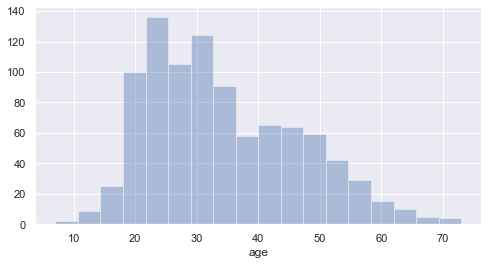

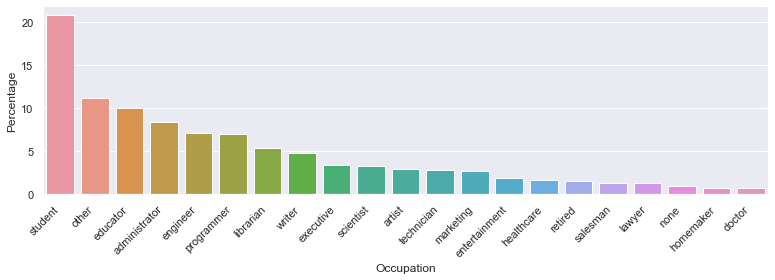

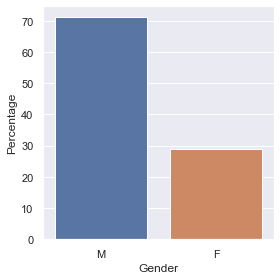

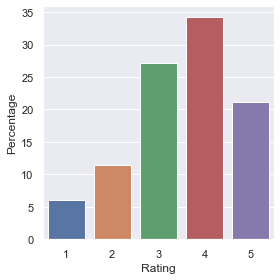

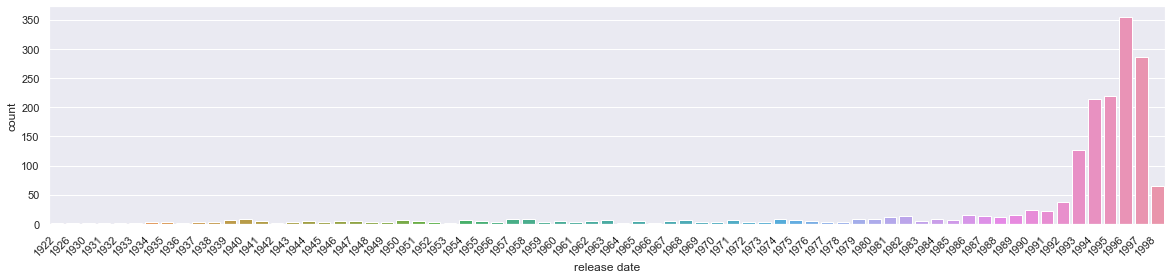

In [75]:

#show age plot
plt.figure(figsize=(8,4))
az=sns.distplot(user['age'], kde=False)
plt.show()

#show occupation plot
plt.figure(figsize=(11,4))
vv=user.occupation.value_counts()/len(user)*100
bb=pd.DataFrame(data=vv)
bb=bb.reset_index()
ay=sns.barplot(x='index',y='occupation',data=bb)
ay.set_xticklabels(ay.get_xticklabels(), rotation=45, ha="right")
ay.set(xlabel='Occupation',ylabel='Percentage')
plt.tight_layout()
plt.show()

#show gender plot
plt.figure(figsize=(4,4))
vv1=user.gender.value_counts()/len(user)*100
bb1=pd.DataFrame(data=vv1)
bb1=bb1.reset_index()
ax=sns.barplot(x='index',y='gender',data=bb1)
ax.set(xlabel='Gender',ylabel='Percentage')
plt.tight_layout()
plt.show()

#show rating plot
plt.figure(figsize=(4,4))
vv2=rating.rating.value_counts()/len(rating)*100
bb2=pd.DataFrame(data=vv2)
bb2=bb2.reset_index()
aw=sns.barplot(x='index',y='rating',data=bb2)
aw.set(xlabel='Rating',ylabel='Percentage')
plt.tight_layout()
plt.show()

#show release year plot
plt.figure(figsize=(20,4))
rd = pd.Series(movie['release date'])
ry = rd.str.slice(start=-4)
av=sns.countplot(ry)
av.set_xticklabels(av.get_xticklabels(), rotation=45, ha="right")
plt.show()



### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

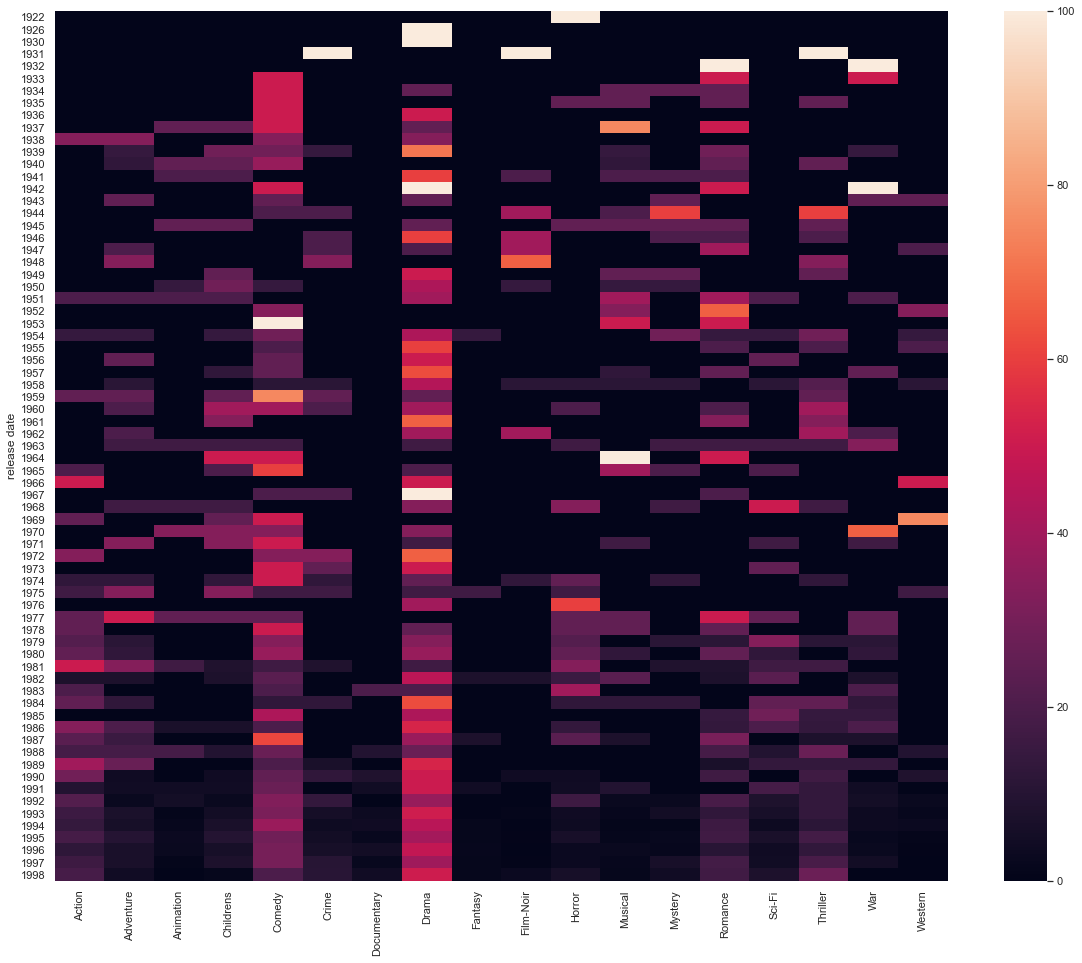

In [23]:
#refine raw data 
data=movie.drop(['movie id', 'movie title'], axis=1)
data['release date']=data['release date'].str.slice(start=-4)
data.drop(['unknown'], axis=1, inplace=True)

#get totals of movies release per year
rg=data.groupby('release date').sum()
rg['tot']=pd.DataFrame(data['release date'].value_counts())

#get percentage of genre per year
rg=rg.div(rg['tot'], axis=0) * 100
rg.drop(['tot'], axis=1, inplace=True)

#set draw parameters and plot heatmap
plt.figure(figsize=(20,16))
sns.heatmap(rg);

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [73]:
#refine raw data
df=rating.drop(['user id', 'timestamp'], axis=1)

#get totals of movies released per year
rf=df.groupby('movie id').sum()

#calculate averages of ratings
rf['tot']=pd.DataFrame(df['movie id'].value_counts())
rf['rating']=rf['rating'].div(rf['tot'], axis=0)

#sort all items with more than 100 ratings
cand = rf[rf['tot'] > 100]
cand = cand.sort_values(['rating'], ascending=False)

#select top 25
cand = cand[:25]

#change id's from 1-based to 0-based for indexing
cand.reset_index(inplace=True)
cand['movie id'] -= 1
cand.drop('tot',axis=1, inplace=True)

#merge in movie titles
blah=pd.DataFrame(movie['movie title'].iloc[cand['movie id']])
blah.reset_index(inplace=True)
blah['rating']=cand['rating']
blah.drop('index', axis=1,inplace=True)
blah

,movie title,rating
0,Jack,4.491071
1,Everyone Says I Love You,4.466443
2,"Wrong Trousers, The",4.466102
3,"Maltese Falcon, The",4.456790
4,"Shawshank Redemption, The",4.445230
5,It Happened One Night,4.387560
6,"Usual Suspects, The",4.385768
7,Star Wars,4.358491
8,12 Angry Men,4.344000
9,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

comb = user.merge(rating, on='user id', how='outer')
comb = comb.merge(movie, on= 'movie id', how='outer')
comb.drop(['rating','Action','Adventure','occupation','zip code','movie id','timestamp','release date','age','user id','unknown','movie title'], axis =1, inplace=True)

#calculate total ratings and divide into genre counts
#drama
bx= pd.DataFrame(comb['gender'].value_counts())
by = pd.DataFrame(comb.groupby('gender')['Drama'].sum())
bx['Drama %']=by['Drama']
bx=bx.div(bx['gender'], axis=0) * 100
bx.drop('gender',axis=1,inplace=True)

#scifi
cx= pd.DataFrame(comb['gender'].value_counts())
cy = pd.DataFrame(comb.groupby('gender')['Sci-Fi'].sum())
cx['SciFi %']=cy['Sci-Fi']
cx=cx.div(cx['gender'], axis=0) * 100
bx['SciFi %']=cx['SciFi %']

#romance
dx= pd.DataFrame(comb['gender'].value_counts())
dy = pd.DataFrame(comb.groupby('gender')['Romance'].sum())
dx['Romance %']=dy['Romance']
dx=dx.div(dx['gender'], axis=0) * 100
bx['Romance %']=dx['Romance %']

print('** All statements above are False! **\n')
print (bx.head())


In [141]:
!jupyter nbconvert --to html MovieLens Project Questions.ipynb

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[NbConvertApp] WARNING | pattern 'MovieLens' matched no files
[NbConvertApp] WARNING | pattern 'Project' matched no files
[NbConvertApp] WARNING | pattern 'Questions.ipynb' matched no files


    Default: ''

    Full path of a config file.

--to=<Unicode> (NbConvertApp.export_format)

    Default: 'html'

    The export format to be used, either one of the built-in formats

    ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf',

    'python', 'rst', 'script', 'slides'] or a dotted object name that represents

    the import path for an `Exporter` class

--template=<Unicode> (TemplateExporter.template_file)

    Default: ''

    Name of the template file to use

--writer=<DottedObjectName> (NbConvertApp.writer_class)

    Default: 'FilesWriter'

    Writer class used to write the  results of the conversion

--post=<DottedOrNone> (NbConvertApp.postprocessor_class)

    Default: ''

    PostProcessor class used to write the results of the conversion

--output=<Unicode> (NbConvertApp.output_base)

    Default: ''

    overwrite base name use for output files. can only be used when converting

    one notebook at a time.

--output-dir=<Unicode> (FilesWriter.